# Dataset D1 - WGS human

## Importing libraries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr

## Data reading and formating - WGS human

In [108]:
data = pd.read_csv('../summary_data/D1_WGS_human_summary.csv')
data['total_corrections']=data['Base - TP']+ data['Base - FP']

## Data reading and formating - WGS human complexity


In [109]:
data_comp = pd.read_csv('../summary_data/D1_WGS_human_complexity_summary.csv')

## Data reading - CPU and RAM for WGS human Coverage 8x

In [110]:
data_cpu_ram = pd.read_csv('../summary_data/D1_WGS_human_cpu_memory.csv')
data_cpu_ram = data_cpu_ram.groupby(['Tool'],as_index=False).mean()

## Defining color dictionary

In [111]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})

## Selecting best gain for each tool

In [112]:
data_best = data.loc[data.groupby(["Tool","Coverage"])["Base Gain"].idxmax()]  
data_comp_best = data_comp.loc[data_comp.groupby(["Tool","Coverage","Complexity"])["Base Gain"].idxmax()]  

<br>
<br>

## Figure 2a
Heatmap depicting the gain across various coverage settings. 
<br> Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage. 
<br> For each tool, the best k-mer size was selected.

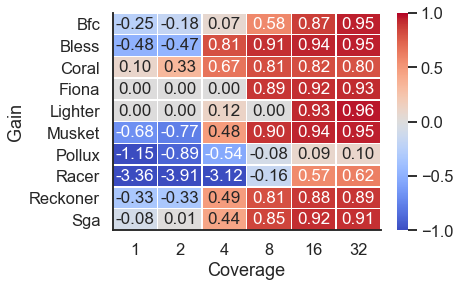

In [113]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Gain')\
    .sort_values(by="Tool", ascending=False)

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':17},
              fmt=".2f",
                vmin=-1.0, 
              vmax=1.0)

colorbar = g.collections[0].colorbar
colorbar.set_ticks([-1.0, -0.5, 0, 0.5, 1.0])

g.set(xlabel='Coverage', ylabel='Gain')
g.set_ylim(0, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2a_heatmap_gain.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/Fig2a_heatmap_gain.pdf", bbox_inches="tight")

<br>
<br>

## Figure 2b
Heatmap depicting the precision across various coverage settings.
<br> Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage.
<br> For each tool, the best k-mer size was selected.

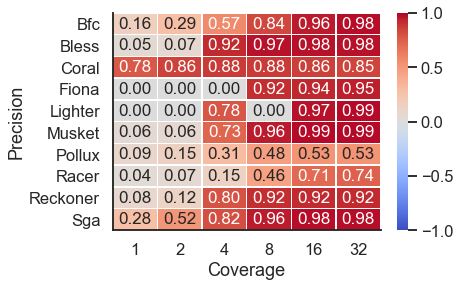

In [114]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Precision')\
    .sort_values(by="Tool", ascending=False)

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':17},
              fmt=".2f",
              vmin=-1, 
              vmax=1)

colorbar = g.collections[0].colorbar
colorbar.set_ticks([-1.0, -0.5, 0, 0.5, 1.0])

g.set(xlabel='Coverage', ylabel='Precision')
g.set_ylim(0, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2b_heatmap_precision.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/Fig2b_heatmap_precision.pdf", bbox_inches="tight")

<br>
<br>

## Figure 2c
Heatmap depicting the sensitivity across various coverage settings. 
<br> Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage.
<br> For each tool, the best k-mer size was selected.

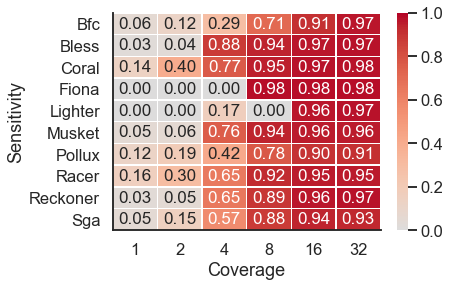

In [115]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Sensitivity')\
    .sort_values(by="Tool", ascending=False)

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':17},
              fmt=".2f", 
              vmax=1)

g.set(xlabel='Coverage', ylabel='Sensitivity')
g.set_ylim(0, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2c_heatmap_sensitivity.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/Fig2c_heatmap_sensitivity.pdf", bbox_inches="tight")

<br>
<br>

## Figure 2d
Scatter plot depicting the number of TP corrections (x-axis) and FP corrections (y-axis) for datasets with 32x coverage. 
<br> For each tool, the best k-mer size was selected.

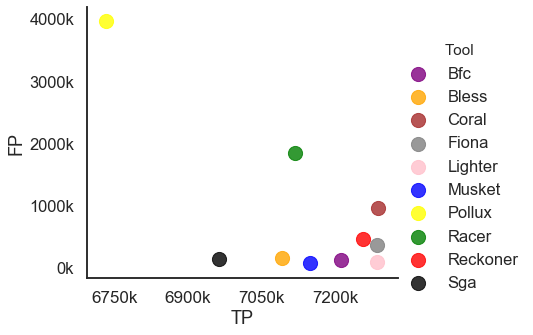

In [116]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)], 
             x='Base - TP', 
             y='Base - FP', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200})

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_locator(tkr.MultipleLocator(1000000))
    ax.xaxis.set_major_locator(tkr.MultipleLocator(150000))


g.set(xlabel='TP', ylabel='FP')

sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2d_TP_vs_FP.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/Fig2d_TP_vs_FP.pdf", bbox_inches="tight")

<br>
<br>

## Figure 2e
Scatter plot depicting the number of FP corrections (x-axis) and FN corrections (y-axis) for datasets with 32x coverage. 
<br> For each tool, the best k-mer size was selected.

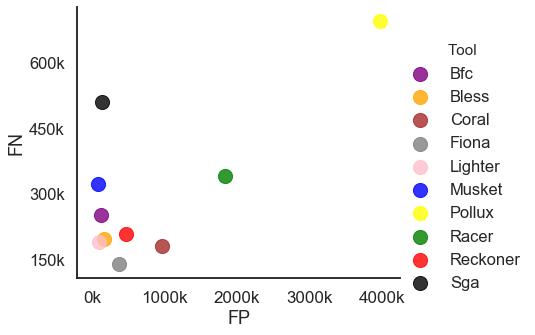

In [117]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)], 
             x='Base - FP', 
             y='Base - FN', 
             hue='Tool', 
             palette=color_dict,
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200})

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_locator(tkr.MultipleLocator(150000))
    ax.xaxis.set_major_locator(tkr.MultipleLocator(1000000))

g.set(xlabel='FP', ylabel='FN')

sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2e_FP_vs_FN.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/Fig2e_FP_vs_FN.pdf", bbox_inches="tight")

<br>
<br>

## Figure 2f
Scatter plot depicting the sensitivity (x-axis) and precision (y-axis) for datasets with 32x coverage. 
<br> For each tool, the best k-mer size was selected.


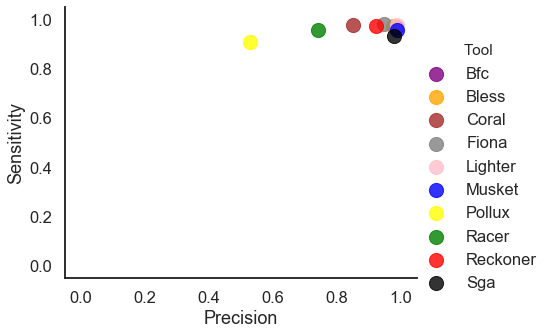

In [118]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)], 
             x='Base Precision', 
             y='Base Sensitivity', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200})

g.set(xlabel='Precision', ylabel='Sensitivity')

plt.ylim(-0.05, 1.05)
plt.xlim(-0.05, 1.05)

g=sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2f_Precision_vs_Sensitivity.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/Fig2f_Precision_vs_Sensitivity.pdf", bbox_inches="tight")

<br>
<br>

## Figure S4a
The effect of the kmer size on the accuracy of the total corrections made across various coverages settings for WGS data with coverage of 1x.
<br> 

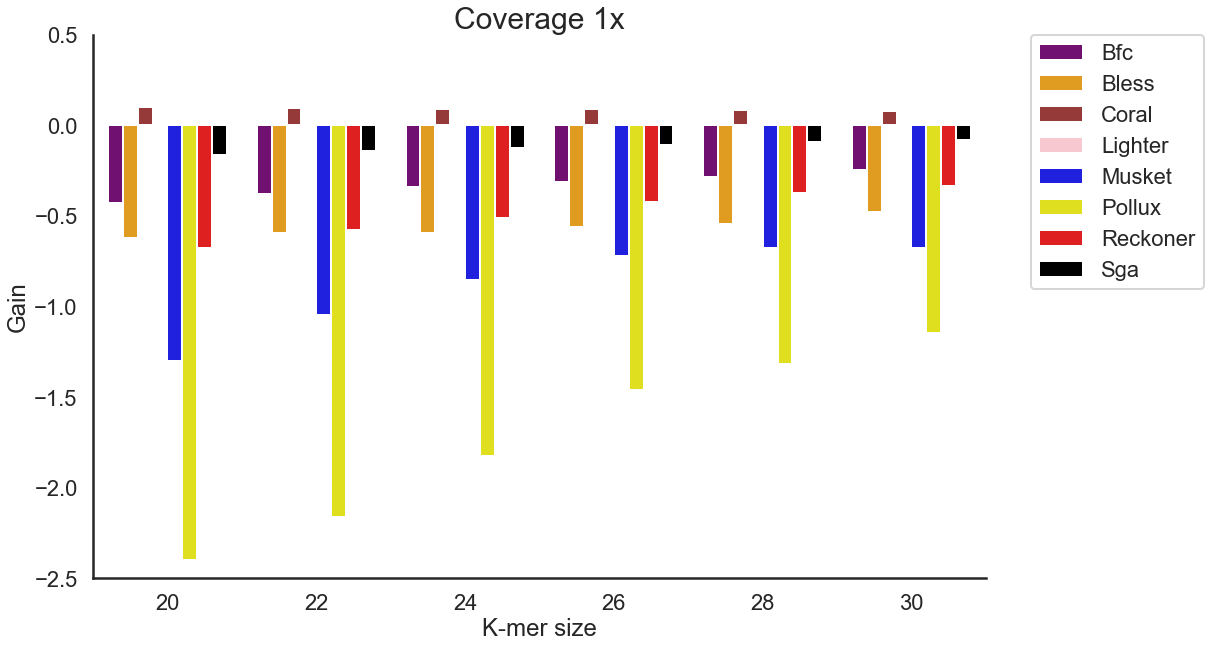

In [119]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] == 1) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='K-mer size', ylabel='Gain')

plt.title("Coverage 1x", fontsize=30)
plt.ylim(-2.5, 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS4a_WGS_human_kmers_gain_cov1.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4a_WGS_human_kmers_gain_cov1.pdf", bbox_inches='tight')

<br>
<br>

## Figure S4b
The effect of the kmer size on the accuracy of the total corrections for WGS data with coverage of 2x.

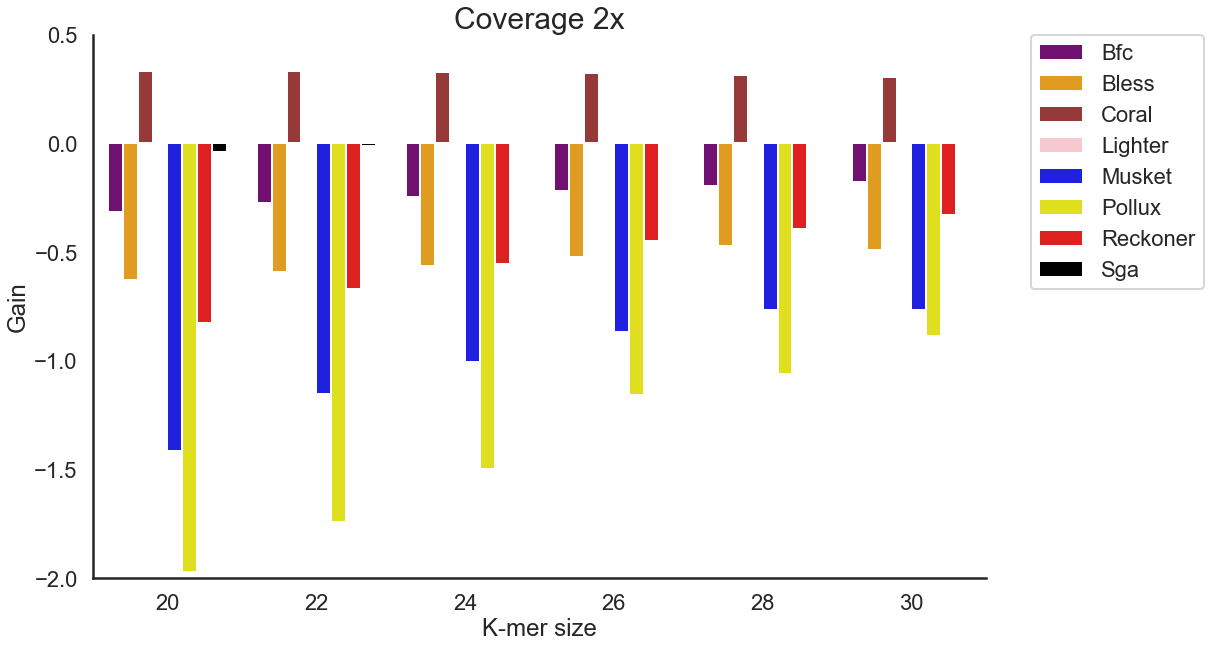

In [120]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] == 2) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='K-mer size', ylabel='Gain')

plt.title("Coverage 2x", fontsize=30)
plt.ylim(-2., 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS4b_WGS_human_kmers_gain_cov2.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4b_WGS_human_kmers_gain_cov2.pdf", bbox_inches='tight')

<br>
<br>

## Figure S4c
The effect of the kmer size on the accuracy of the total corrections for WGS data with coverage of 4x.

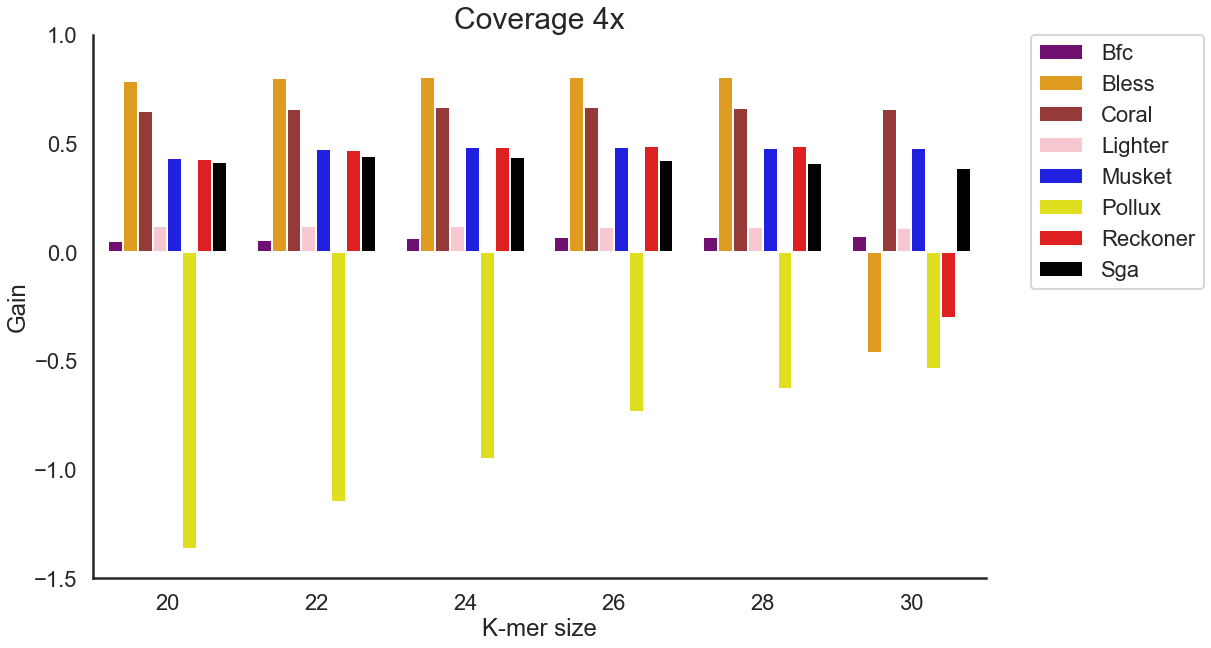

In [121]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] ==4) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='K-mer size', ylabel='Gain')

plt.title("Coverage 4x", fontsize=30)
plt.ylim(-1.5, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS4c_WGS_human_kmers_gain_cov4.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4c_WGS_human_kmers_gain_cov4.pdf", bbox_inches='tight')

<br>
<br>

## Figure S4d
The effect of the kmer size on the accuracy of the total corrections for WGS data with coverage of 8x.

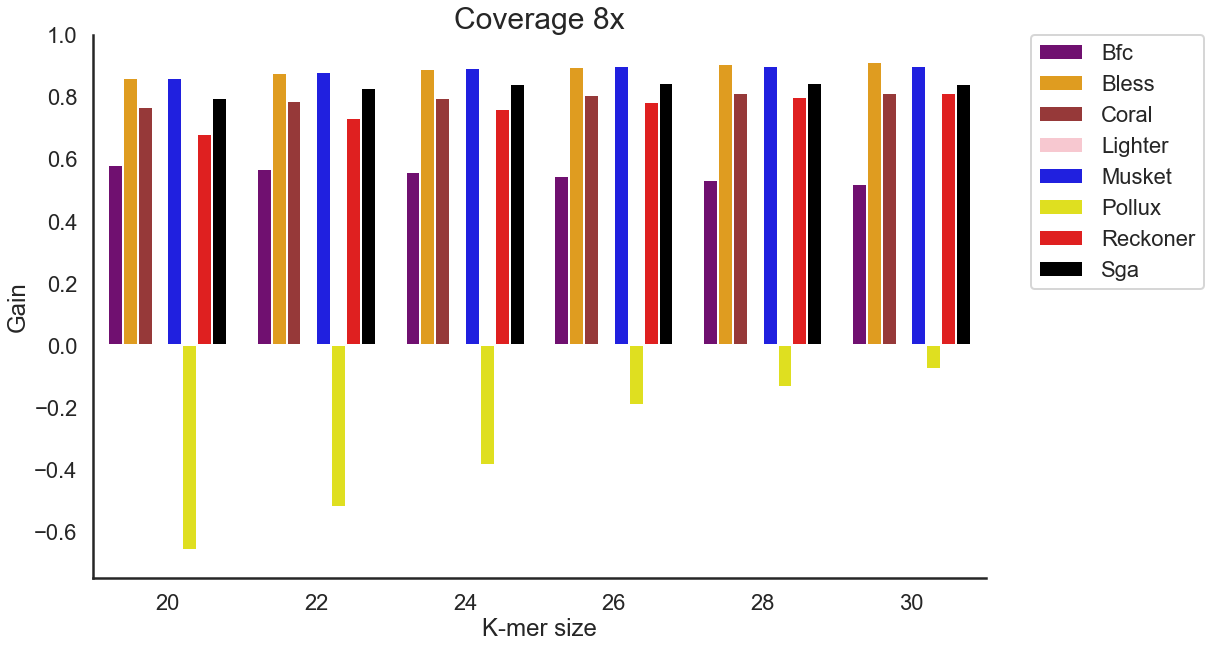

In [122]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] ==8)  & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='K-mer size', ylabel='Gain')

plt.title("Coverage 8x", fontsize=30)
plt.ylim(-0.75, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS4d_WGS_human_kmers_gain_cov8.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4d_WGS_human_kmers_gain_cov8.pdf", bbox_inches='tight')

<br>
<br>

## Figure S4e
The effect of the kmer size on the accuracy of the total corrections for WGS data with coverage of 16x.

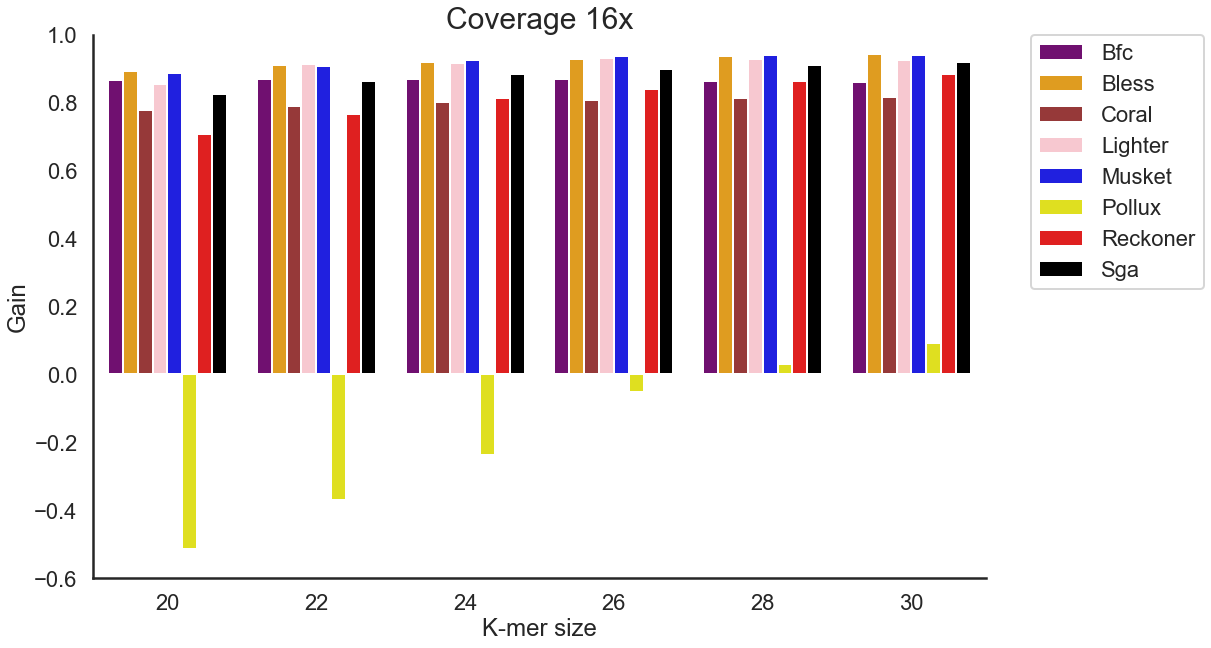

In [123]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] ==16) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='K-mer size', ylabel='Gain')

plt.title("Coverage 16x", fontsize=30)
plt.ylim(-.6, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS4e_WGS_human_kmers_gain_cov16.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4e_WGS_human_kmers_gain_cov16.pdf", bbox_inches='tight')

<br>
<br>

## Figure S4f
The effect of the kmer size on the accuracy of the total corrections for WGS data with coverage of 32x.

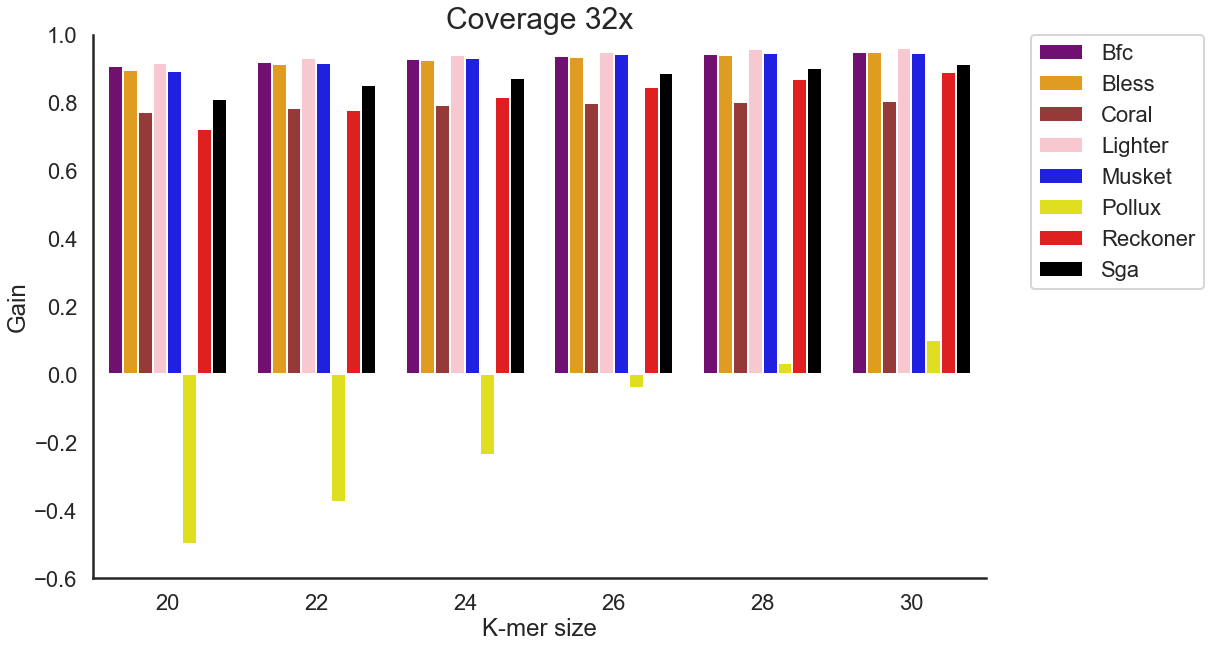

In [124]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] ==32) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='K-mer size', ylabel='Gain')

plt.title("Coverage 32x", fontsize=30)
plt.ylim(-.6, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS4f_WGS_human_kmers_gain_cov32.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4f_WGS_human_kmers_gain_cov32.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5a
The effect of coverage on the total number of corrections WGS human data with coverage of 1x.

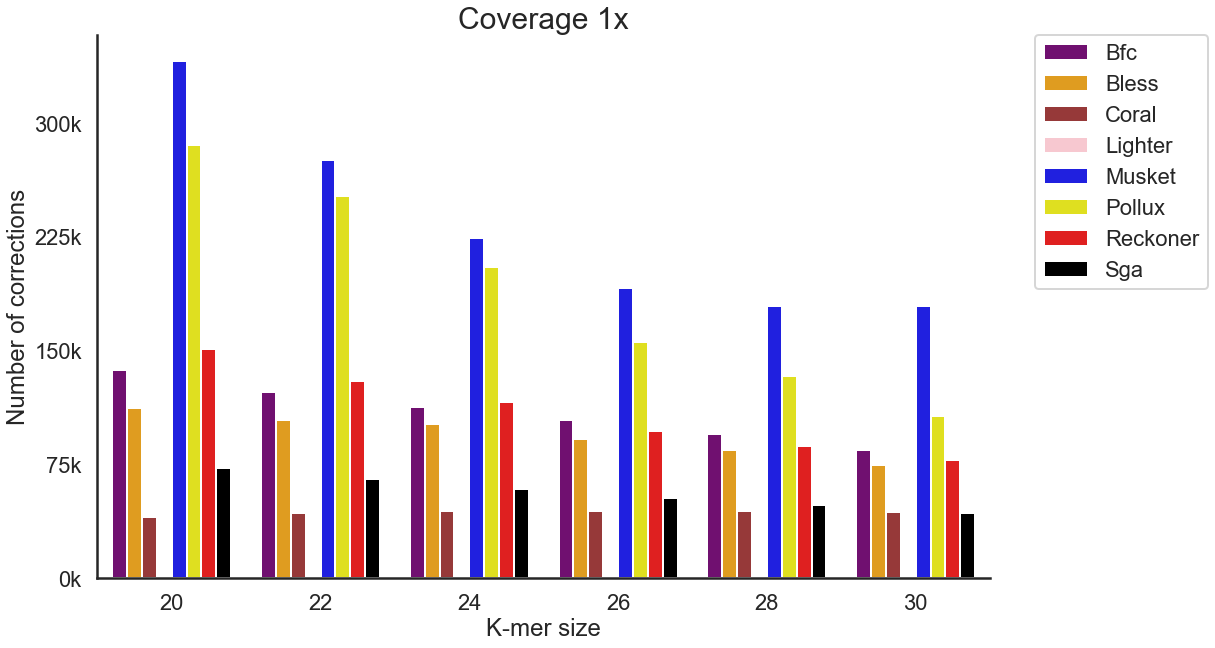

In [125]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==1) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
g.yaxis.set_major_locator(tkr.MultipleLocator(75000))
    
g.set(xlabel='K-mer size', ylabel='Number of corrections')

plt.title("Coverage 1x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS5a_WGS_human_kmers_total_corrections_cov1.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5a_WGS_human_kmers_total_corrections_cov1.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5b
The effect of coverage on the total number of corrections WGS human data with coverage of 2x.

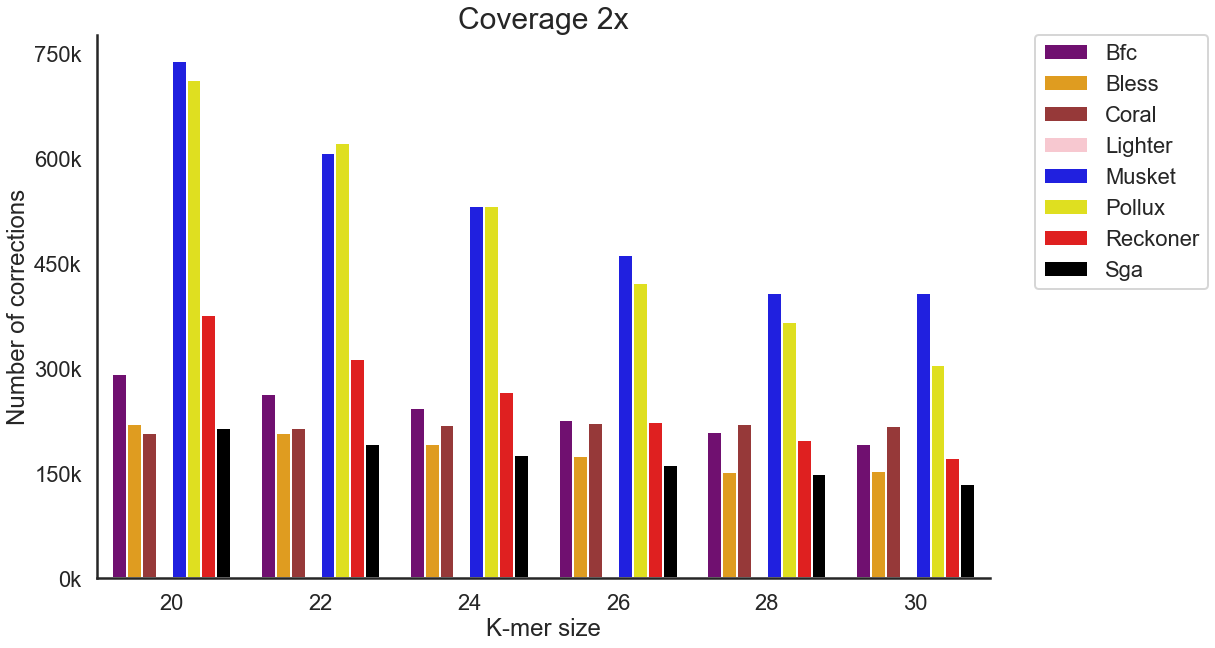

In [126]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==2) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
g.yaxis.set_major_locator(tkr.MultipleLocator(150000))

g.set(xlabel='K-mer size', ylabel='Number of corrections')

plt.title("Coverage 2x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS5b_WGS_human_kmers_total_corrections_cov2.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5b_WGS_human_kmers_total_corrections_cov2.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5c
The effect of coverage on the total number of corrections WGS human data with coverage of 4x.

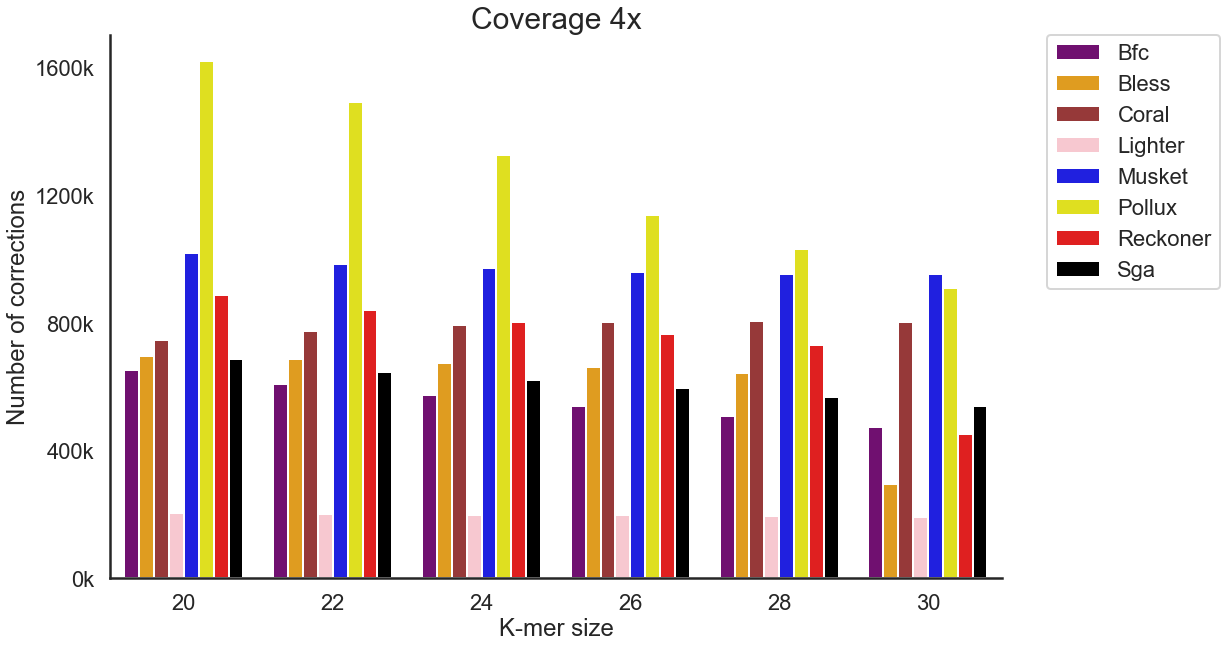

In [127]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==4) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
g.yaxis.set_major_locator(tkr.MultipleLocator(400000))

g.set(xlabel='K-mer size', ylabel='Number of corrections')

plt.title("Coverage 4x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS5c_WGS_human_kmers_total_corrections_cov4.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5c_WGS_human_kmers_total_corrections_cov4.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5d
The effect of coverage on the total number of corrections WGS human data with coverage of 8x.

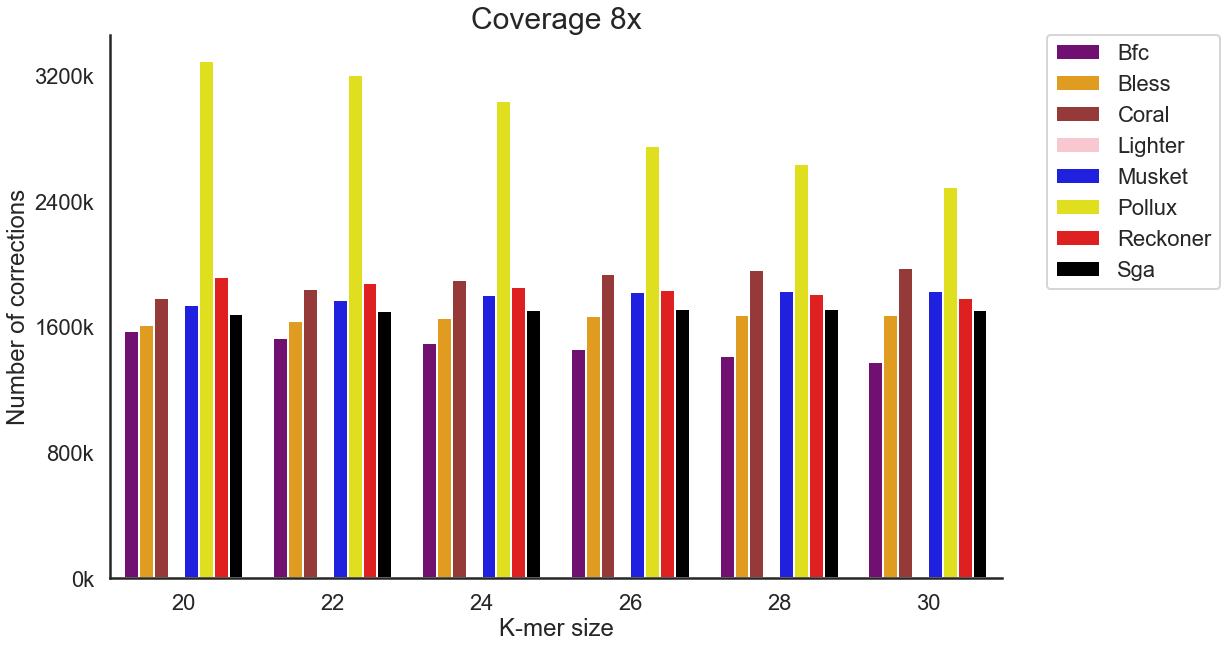

In [128]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==8) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
g.yaxis.set_major_locator(tkr.MultipleLocator(800000))

g.set(xlabel='K-mer size', ylabel='Number of corrections')

plt.title("Coverage 8x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS5d_WGS_human_kmers_total_corrections_cov8.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5d_WGS_human_kmers_total_corrections_cov8.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5e
The effect of coverage on the total number of corrections WGS human data with coverage of 16x.

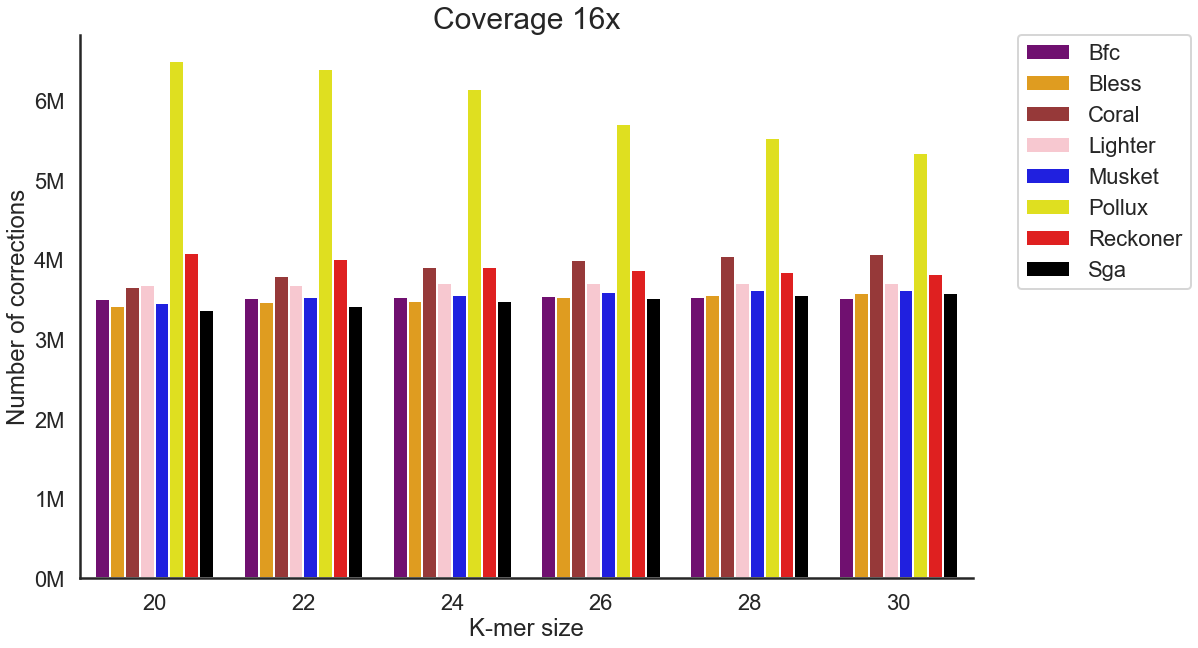

In [129]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==16) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}M".format(x/1000000)))
g.yaxis.set_major_locator(tkr.MultipleLocator(1000000))

g.set(xlabel='K-mer size', ylabel='Number of corrections')

plt.title("Coverage 16x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()


plt.savefig("../figures/D1_WGS_human/FigS5e_WGS_human_kmers_total_corrections_cov16.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5e_WGS_human_kmers_total_corrections_cov16.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5f
The effect of coverage on the total number of corrections WGS human data with coverage of 32x.

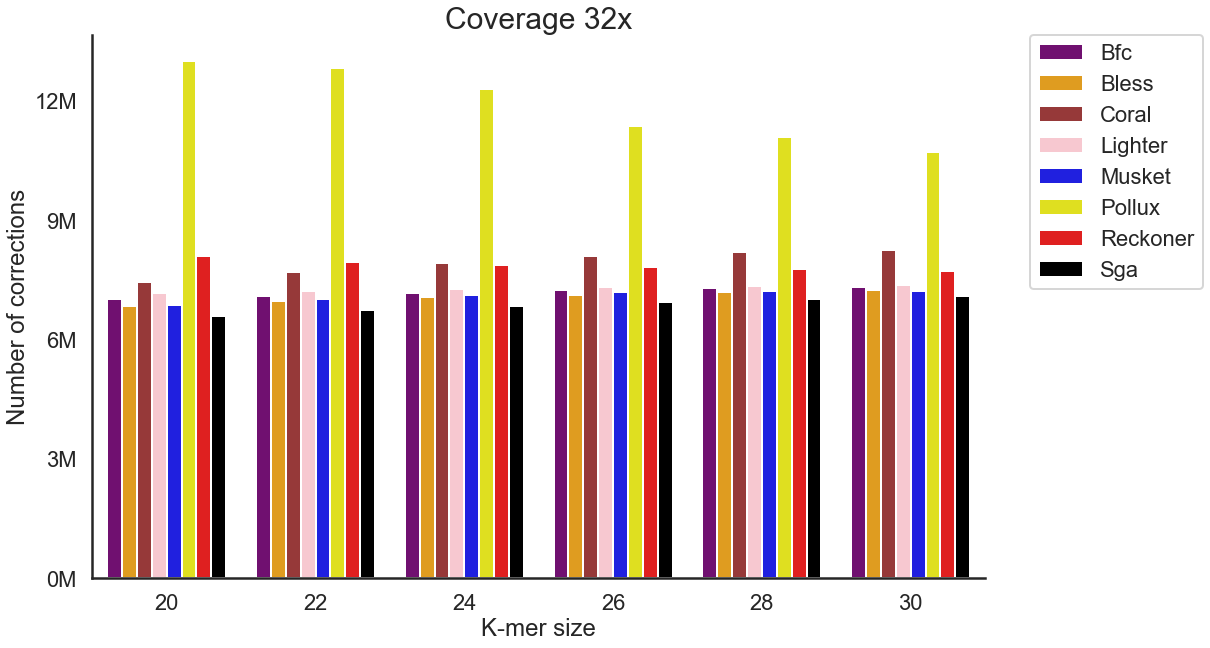

In [130]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==32) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}M".format(x/1000000)))
g.yaxis.set_major_locator(tkr.MultipleLocator(3000000))

g.set(xlabel='K-mer size', ylabel='Number of corrections')

plt.title("Coverage 32x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()


plt.savefig("../figures/D1_WGS_human/FigS5f_WGS_human_kmers_total_corrections_cov32.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5f_WGS_human_kmers_total_corrections_cov32.pdf", bbox_inches='tight')

<br>
<br>

## Figure S6a
The effect of coverage on the total number of corrections of the error correction tools across various coverages settings for WGS human dataset.
<br> For each tool, the best k-mer size was selected.

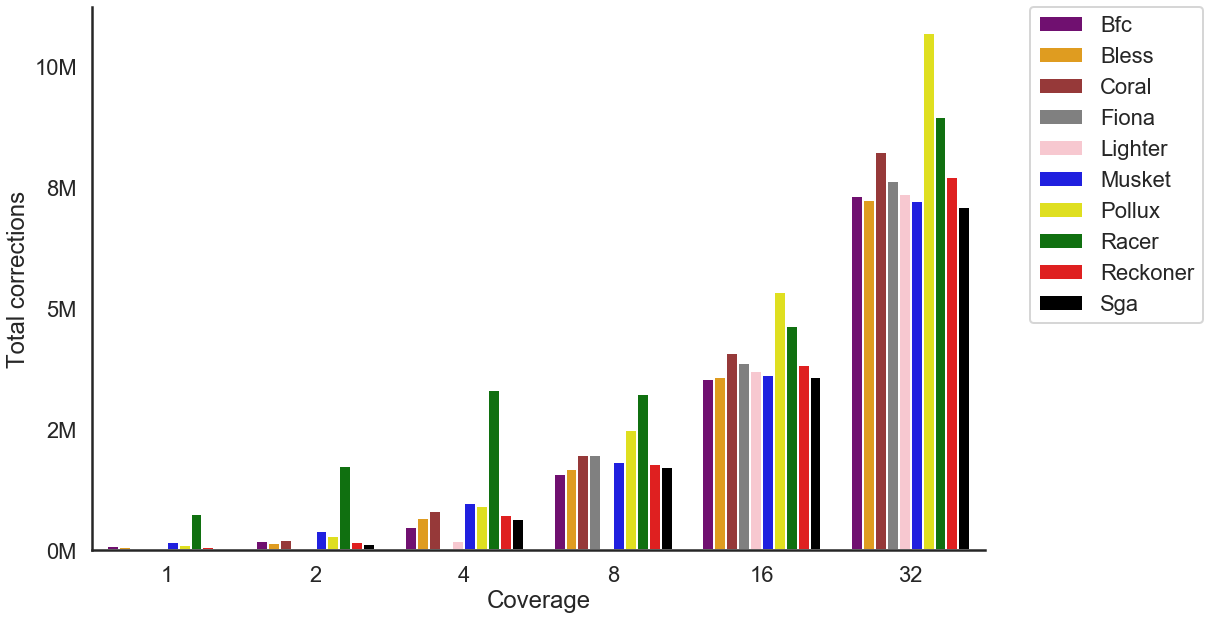

In [131]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot(x="Coverage", 
              y="total_corrections",
              data = data_best,
              hue='Tool', 
              palette=color_dict)

g.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}M".format(x/1000000)))
g.yaxis.set_major_locator(tkr.MultipleLocator(2500000))

g.set(xlabel='Coverage', ylabel='Total corrections')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS6a_WGS_human_total_corrections_cov.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS6a_WGS_human_total_corrections_cov.pdf", bbox_inches='tight')

<br>
<br>

## Figure S6b
The effect of coverage on the total number of TP corrections of the error correction tools across various coverages settings for WGS human dataset.
<br> For each tool, the best k-mer size was selected.

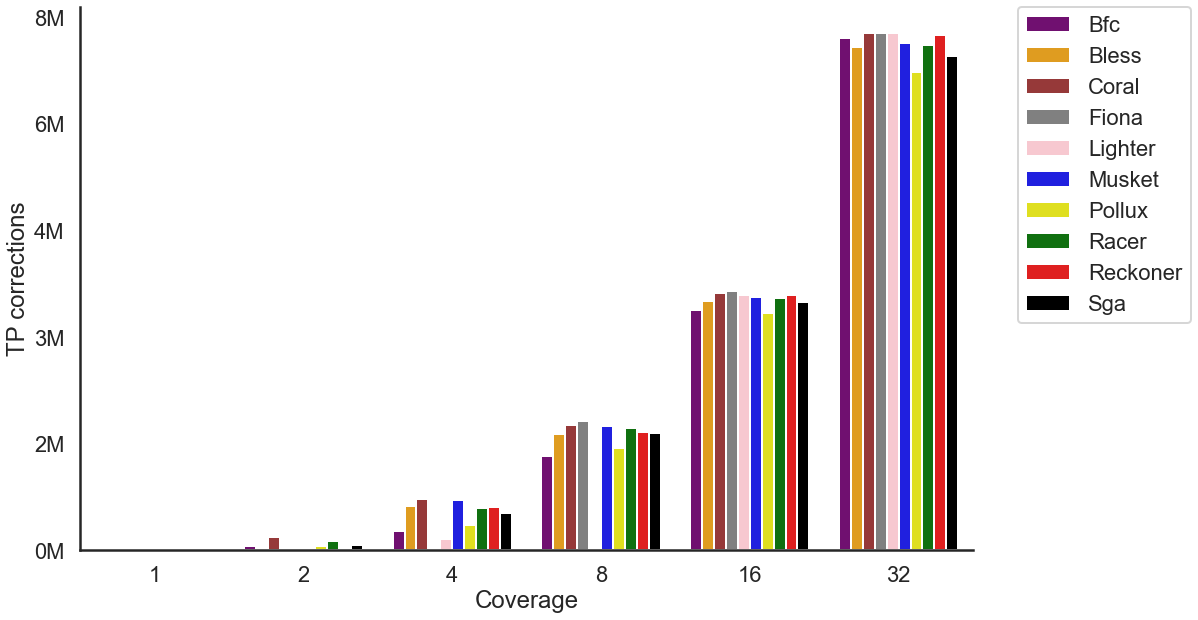

In [132]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot(x="Coverage", 
              y="Base - TP",
              data = data_best,
              hue='Tool', 
              palette=color_dict)

g.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}M".format(x/1000000)))
g.yaxis.set_major_locator(tkr.MultipleLocator(1500000))

g.set(xlabel='Coverage', ylabel='TP corrections')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS6b_WGS_human_TP_corrections_cov.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS6b_WGS_human_TP_corrections_cov.pdf", bbox_inches='tight')

<br>
<br>

## Figure S6c
The effect of coverage on the total number of FP corrections of the error correction tools across various coverages settings for WGS human dataset. 
<br> For each tool, the best k-mer size was selected.

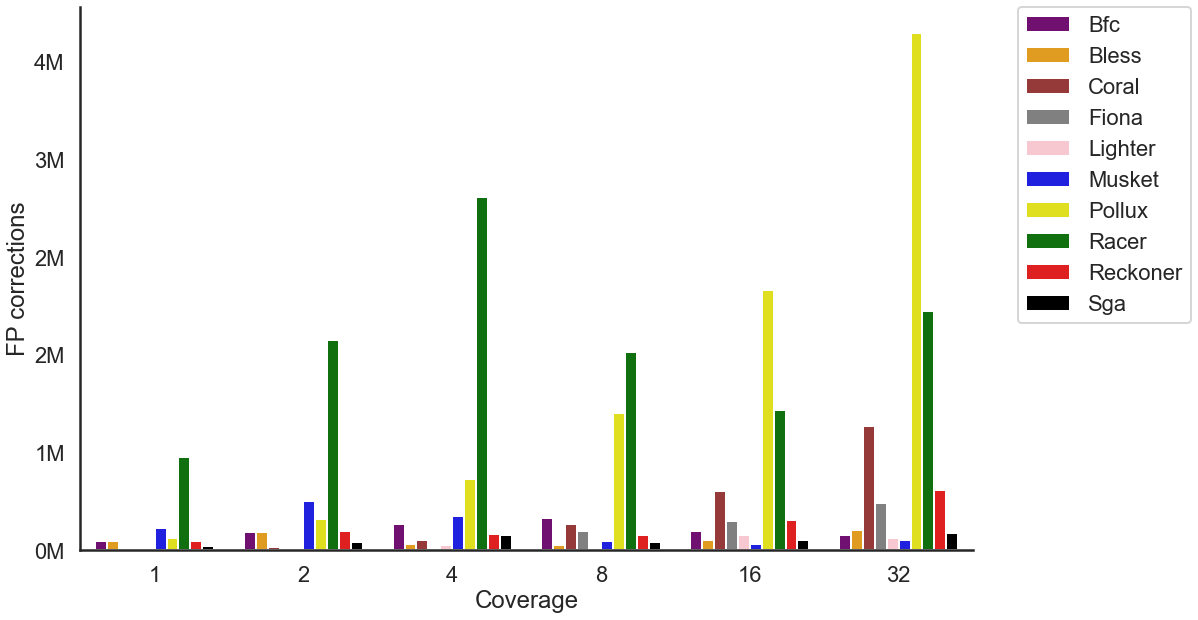

In [133]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot(x="Coverage", 
              y="Base - FP",
              data = data_best,
              hue='Tool', 
              palette=color_dict)

g.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}M".format(x/1000000)))
g.yaxis.set_major_locator(tkr.MultipleLocator(750000))

g.set(xlabel='Coverage', ylabel='FP corrections')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS6c_WGS_human_FP_corrections_cov.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS6c_WGS_human_FP_corrections_cov.pdf", bbox_inches='tight')

<br>
<br>

## Figure S7
The portion of trimmed bases across various coverages settings.
<br>For each tool, the best k-mer size was selected. 


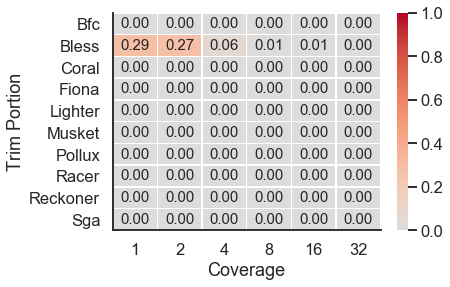

In [134]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Trim Percent')\
    .sort_values(by="Tool", ascending=False)

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=0, 
              vmax=1)

g.set(xlabel='Coverage', ylabel='Trim Portion')
g.set_ylim(0, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS7_heatmap_human_trimpercent.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS7_heatmap_human_trimpercent.pdf", bbox_inches="tight")

<br>
<br>

## Figure S8
The efficiency of trimming across various coverages settings.
<br>For each tool, the best k-mer size was selected.


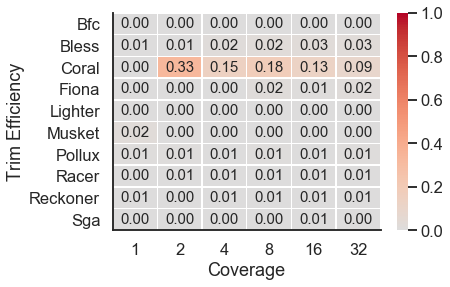

In [135]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Trim Efficiency')\
        .sort_values(by="Tool", ascending=False)

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=0, 
              vmax=1)

g.set(xlabel='Coverage', ylabel='Trim Efficiency')
g.set_ylim(0, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS8_heatmap_humna_trimefficiency.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS8_heatmap_human_trimefficiency.pdf", bbox_inches="tight")

<br>
<br>

## Figure S9a
Trimming Efficiency vs. Trim Portion for WGS human data for coverage 1x.
<br>For each tool, the best k-mer size was selected.


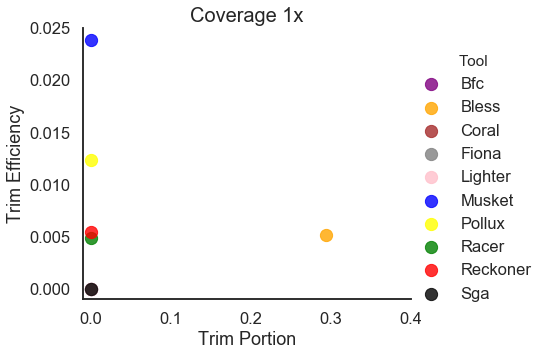

In [136]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 1)],
             x='Trim Percent', 
             y='Trim Efficiency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Portion', ylabel='Trim Efficiency')

plt.title("Coverage 1x", fontsize=20)
plt.xlim(-0.01, .4)
plt.ylim(-0.001, .025)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS9a_Precision_vs_Sensitivity_cov1.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS9a_Precision_vs_Sensitivity_cov1.pdf", bbox_inches="tight")

<br>
<br>

## Figure S9b
Trimming Efficiency vs. Trim Portion for WGS human data for coverage 2x.
<br>For each tool, the best k-mer size was selected.


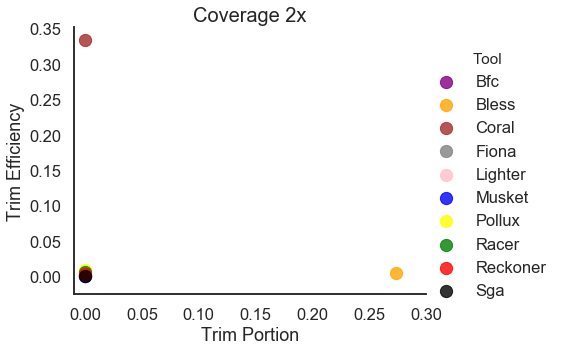

In [137]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 2)],
             x='Trim Percent', 
             y='Trim Efficiency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Portion', ylabel='Trim Efficiency')

plt.title("Coverage 2x", fontsize=20)
plt.xlim(-0.01, .3)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS9b_Precision_vs_Sensitivity_cov2.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS9b_Precision_vs_Sensitivity_cov2.pdf", bbox_inches="tight")

<br>
<br>

## Figure S9c
Trimming Efficiency vs. Trim Portion for WGS human data for coverage 4x.
<br>For each tool, the best k-mer size was selected.


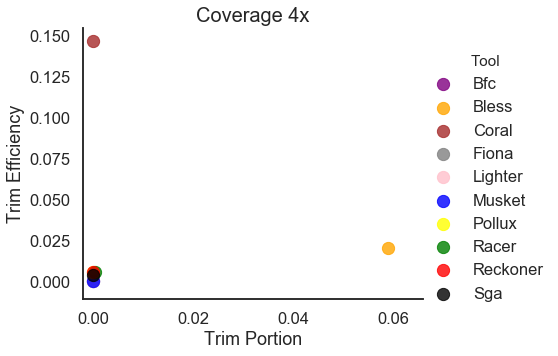

In [138]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 4)],
             x='Trim Percent', 
             y='Trim Efficiency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Portion', ylabel='Trim Efficiency')

plt.title("Coverage 4x", fontsize=20)
plt.xlim(-0.002, .066)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS9c_Precision_vs_Sensitivity_cov4.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS9c_Precision_vs_Sensitivity_cov4.pdf", bbox_inches="tight")

<br>
<br>

## Figure S9d
Trimming Efficiency vs. Trim Portion for WGS human data for coverage 8x.
<br>For each tool, the best k-mer size was selected.


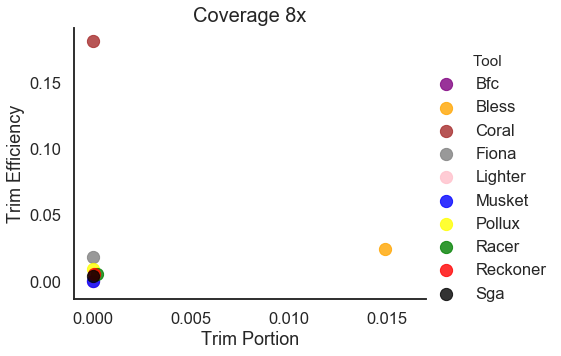

In [139]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 8)],
             x='Trim Percent', 
             y='Trim Efficiency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Portion', ylabel='Trim Efficiency')

plt.title("Coverage 8x", fontsize=20)
plt.xlim(-0.001, .017)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS9d_Precision_vs_Sensitivity_cov8.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS9d_Precision_vs_Sensitivity_cov8.pdf", bbox_inches="tight")

<br>
<br>

## Figure S9e
Trimming Efficiency vs. Trim Portion for WGS human data for coverage 16x.
<br>For each tool, the best k-mer size was selected.


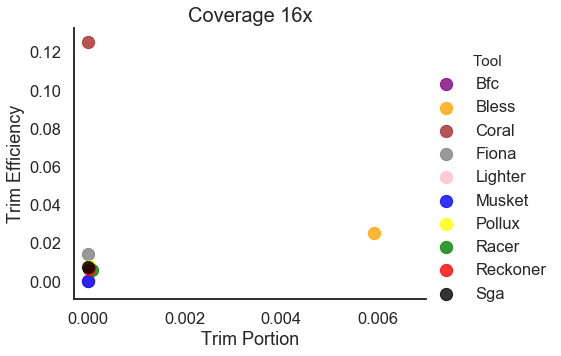

In [140]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 16)],
             x='Trim Percent', 
             y='Trim Efficiency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Portion', ylabel='Trim Efficiency')

plt.title("Coverage 16x", fontsize=20)
plt.xlim(-0.0003, .007)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS9e_Precision_vs_Sensitivity_cov16.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS9e_Precision_vs_Sensitivity_cov16.pdf", bbox_inches="tight")

<br>
<br>

## Figure S9f
Trimming Efficiency vs. Trim Portion for WGS human data for coverage 32x.
<br>For each tool, the best k-mer size was selected.


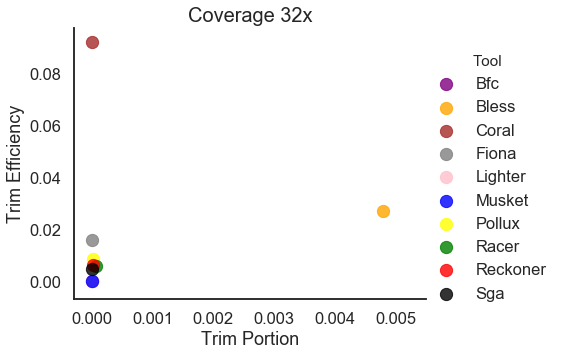

In [141]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)],
             x='Trim Percent', 
             y='Trim Efficiency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Portion', ylabel='Trim Efficiency')

plt.title("Coverage 32x", fontsize=20)
plt.xlim(-0.0003, .0055)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS9f_Precision_vs_Sensitivity_cov32.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS9f_Precision_vs_Sensitivity_cov32.pdf", bbox_inches="tight")

<br>
<br>

## Figure S10a
Heatmap depicting the gain for low complexity regions (‘low’) and the rest of the genome (‘normal’) 
for WGS human data with 16x coverage.
<br>For each tool, the best k-mer size was selected.


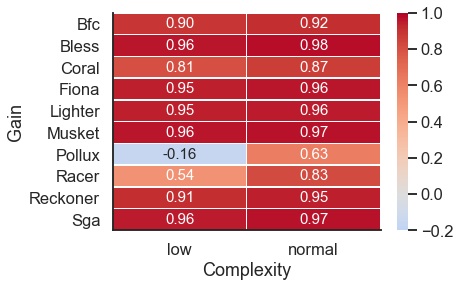

In [142]:
result = data_comp_best[(data_comp_best['Coverage'] == 16)]\
        .pivot(index='Tool', columns='Complexity', values='Base Gain')\
        .sort_values(by="Tool", ascending=False)

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result,
              annot=True,
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=-0.2,
              vmax=1)

g.set(xlabel='Complexity', ylabel='Gain')
g.set_ylim(0, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS10a_gain_complexity_16.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS10a_gain_complexity_16.pdf", bbox_inches="tight")

<br>
<br>

## Figure S10b
Heatmap depicting the gain for low complexity regions (‘low’) and the rest of the genome (‘normal’) 
for WGS human data with 32x coverage.
<br>For each tool, the best k-mer size was selected.

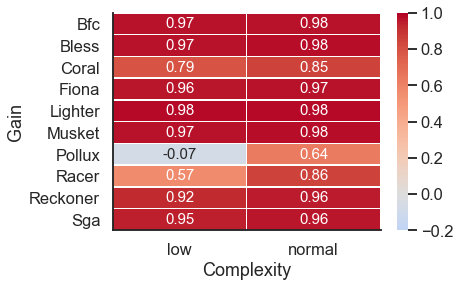

In [143]:
result = data_comp_best[(data_comp_best['Coverage'] == 32)]\
        .pivot(index='Tool', columns='Complexity', values='Base Gain')\
        .sort_values(by="Tool", ascending=False)

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result,
              annot=True,
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=-0.2,
              vmax=1)

g.set(xlabel='Complexity', ylabel='Gain')
g.set_ylim(0, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS10a_gain_complexity_32.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS10a_gain_complexity_32.pdf", bbox_inches="tight")

<br>
<br>

## Figure S11a
Barplot depicting the CPU time for the datasaet WGS human. 
<br> For each tool, the mean value across different kmer sizes was selected.

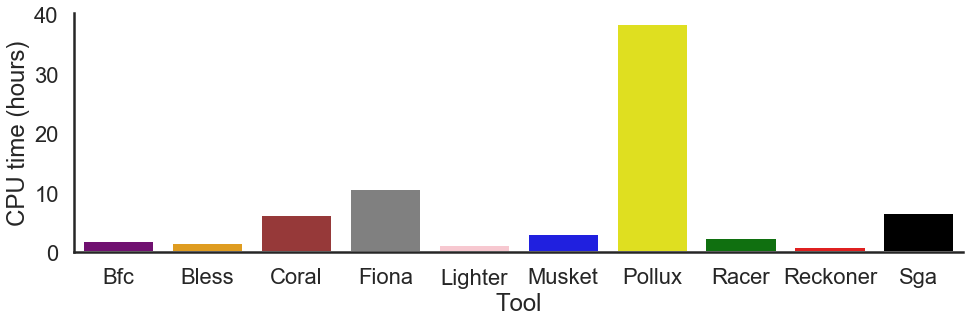

In [144]:
sns.set_style("white")
sns.set_context("poster")

g=sns.catplot(x="Tool", 
              y="Cpu",
              data = data_cpu_ram, 
              palette=color_dict, 
              kind="bar",
              aspect=2.8)

g.set( ylabel='CPU time (hours)')

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS11a_WGS_human_cpu.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS11a_WGS_human_cpu.pdf", bbox_inches='tight')

<br>
<br>

## Figure S11b
Barplot depicting tthe maximum amount of RAM for the datasaet WGS human. 
<br> For each tool, the mean value across different kmer sizes was selected.

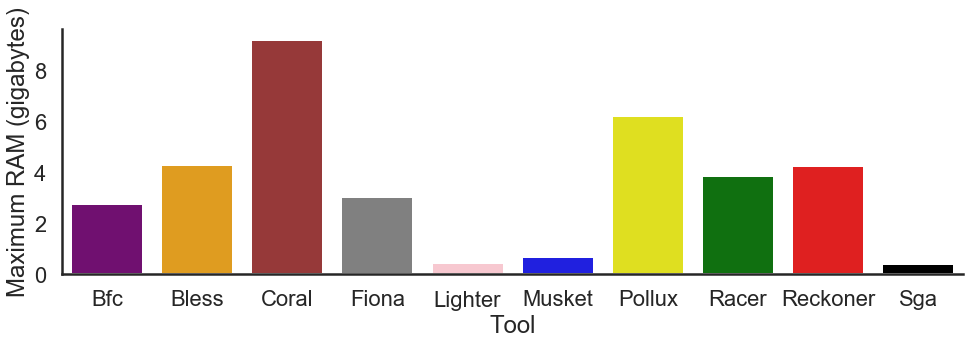

In [145]:
sns.set_style("white")
sns.set_context("poster")

g=sns.catplot(x="Tool", 
              y="Ram",
              data = data_cpu_ram, 
              palette=color_dict, 
              kind="bar",
              aspect=2.8)

g.set( ylabel='Maximum RAM (gigabytes)')

sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS11b_WGS_human_ram.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS11b_WGS_human_ram.pdf", bbox_inches='tight')